<div style="text-align:center; font-size:29px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Lista 7
</div>

**Zuzanna Nasiłowska**

**Zadanie 1**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

**zagadnienie początkowe**

$$
y_{n+1} = y_{n} + h(x_n^2 - 4y_{n})
$$

In [18]:
def euler(y_0, f, n, x):
    y = y_0
    xs = np.linspace(0, x, n+1)
    h = xs[1] - xs[0]
    ys = [y_0]
    for i in range(n):
        y = y + h * f(xs[i], y)
        ys.append(y)
    return y, ys



In [19]:
def f1(x,y):
    return x**2 - 4*y

**Wyniki- metoda Eulera**

In [8]:
print(euler(1, f1, 1, 0.03)[0])
print(euler(1, f1, 2, 0.03)[0])
print(euler(1, f1, 4, 0.03)[0])

0.88
0.883603375
0.8852986406921876


**Porównanie z rozwiązaniem analitycznym**

In [9]:
analytical_solution = lambda x: 31/32 * np.exp(-4*x) + 1/4 * x**2 - 1/8 * x + 1/32
print(analytical_solution((0.03)))

0.8869291730697463


In [22]:
def runge_kutta_2nd_order(y_0, f, n, x):
    y = y_0 
    xs = np.linspace(0, x, n+1)
    h = xs[1] - xs[0]
    ys = [y_0]
    for i in range(n):
        k1 = f(xs[i], y)
        k2 = f(xs[i] + 1/2 * h, y + 1/2* k1 * h)
        y = y + h * k2
        ys.append(y)
    return y, ys

**Wyniki - metoda Rungego-Kutty drugiego rzędu**

In [23]:
print(runge_kutta_2nd_order(1, f1, 1, 0.03)[0])
print(runge_kutta_2nd_order(1, f1, 2, 0.03)[0])
print(runge_kutta_2nd_order(1, f1, 4, 0.03)[0])

0.88720675
0.8869955271437501
0.8869453945835604


In [14]:
def runge_kutta_4th_order(y_0, f, n, x):
    y = y_0 
    xs = np.linspace(0, x, n+1)
    h = xs[1] - xs[0]
    ys = [y_0]
    for i in range(n):
        k1 = f(xs[i], y)
        k2 = f(xs[i] + h/2, y + h * k1/2)
        k3 = f(xs[i] + h/2, y + h * k2/2)
        k4 = f(xs[i] + h, y + h * k3)
        y += h / 6 * (k1 + 2*k2 + 2*k3 + k4)
        ys.append(y)
    return y,ys

**Wyniki- metoda Rungego-Kutty czwartego rzędu**

In [15]:
print(runge_kutta_4th_order(1, f1, 1, 0.03)[0])
print(runge_kutta_4th_order(1, f1, 2, 0.03)[0])
print(runge_kutta_4th_order(1, f1, 4, 0.03)[0])

0.8869293781
0.8869291852678767
0.8869291738135916


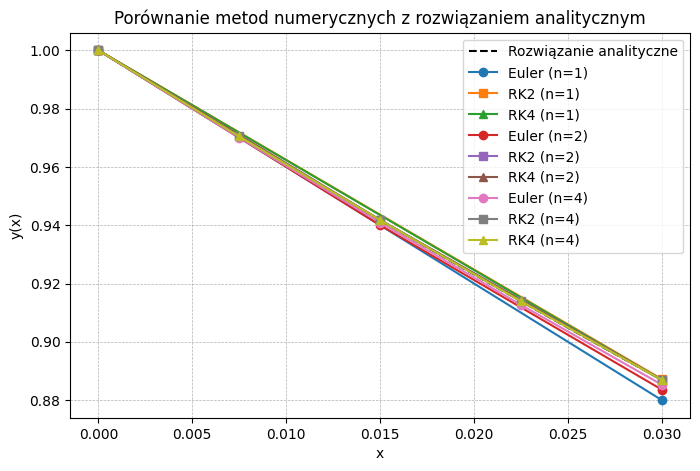

In [29]:
def f1(x, y):
    return x**2 - 4*y

def euler(y_0, f, n, x):
    y = y_0
    xs = np.linspace(0, x, n+1)
    h = xs[1] - xs[0]
    ys = [y_0]
    for i in range(n):
        y = y + h * f(xs[i], y)
        ys.append(y)
    return xs, ys

def runge_kutta_2nd_order(y_0, f, n, x):
    y = y_0
    xs = np.linspace(0, x, n+1)
    h = xs[1] - xs[0]
    ys = [y_0]
    for i in range(n):
        k1 = f(xs[i], y)
        k2 = f(xs[i] + 1/2 * h, y + 1/2 * k1 * h)
        y = y + h * k2
        ys.append(y)
    return xs, ys

def runge_kutta_4th_order(y_0, f, n, x):
    y = y_0
    xs = np.linspace(0, x, n+1)
    h = xs[1] - xs[0]
    ys = [y_0]
    for i in range(n):
        k1 = f(xs[i], y)
        k2 = f(xs[i] + h/2, y + h * k1/2)
        k3 = f(xs[i] + h/2, y + h * k2/2)
        k4 = f(xs[i] + h, y + h * k3)
        y += h / 6 * (k1 + 2*k2 + 2*k3 + k4)
        ys.append(y)
    return xs, ys

def analytical_solution(x):
    return (31/32) * np.exp(-4*x) + (1/4) * x**2 - (1/8) * x + (1/32)

x_end = 0.03
y_0 = 1
steps = [1, 2, 4]


plt.figure(figsize=(8, 5))
x_vals = np.linspace(0, x_end, 100)
y_vals = analytical_solution(x_vals)
plt.plot(x_vals, y_vals, label="Rozwiązanie analityczne", color='black', linestyle="--")

for n in steps:
    x_euler, y_euler = euler(y_0, f1, n, x_end)
    plt.plot(x_euler, y_euler, marker="o", linestyle="-", label=f"Euler (n={n})")

    x_rk2, y_rk2 = runge_kutta_2nd_order(y_0, f1, n, x_end)
    plt.plot(x_rk2, y_rk2, marker="s", linestyle="-", label=f"RK2 (n={n})")

    x_rk4, y_rk4 = runge_kutta_4th_order(y_0, f1, n, x_end)
    plt.plot(x_rk4, y_rk4, marker="^", linestyle="-", label=f"RK4 (n={n})")

plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Porównanie metod numerycznych z rozwiązaniem analitycznym")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


Widzimy, że metoda Eulera jest najmniej dokładna – jej wyniki odbiegają najbardziej od rozwiązania analitycznego, szczególnie przy mniejszej liczbie kroków

RK4 jest zdecydowanie najlepsza – zapewnia bardzo dobre wyniki nawet przy małej liczbie kroków. 

**Zadanie 2**

In [30]:
def f2(x,y):
    return np.sin(y)

In [31]:
euler_values = euler(1, f2, 5, 0.5)[1]
rk_values = runge_kutta_4th_order(1, f2, 5, 0.5)[1]

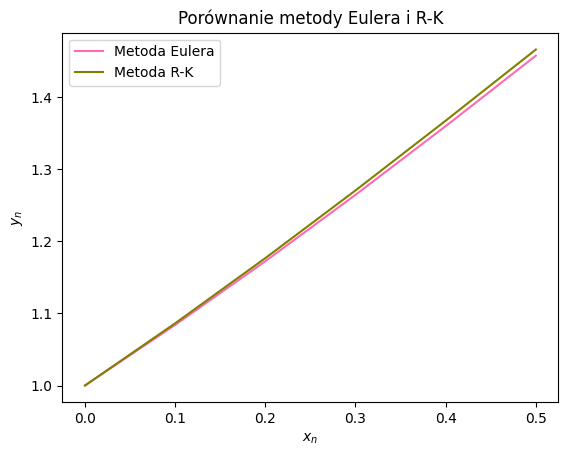

In [33]:
xs = np.arange(0,0.6,0.1)
plt.plot(xs, euler_values, label="Metoda Eulera", color="hotpink")
plt.plot(xs, rk_values, label="Metoda R-K", color="olive")
plt.legend(loc="best")
plt.title("Porównanie metody Eulera i R-K")
plt.xlabel("$x_n$")
plt.ylabel("$y_n$")
plt.show()

Metoda Rungego-Kutty 4. rzędu (RK4) jest znacznie dokładniejsza od metody Eulera i powinna być preferowaną metodą dla tego typu równań różniczkowych. Euler jest prostszy, ale wymaga bardzo małych kroków czasowych, aby uzyskać dobrą dokładność, co czyni go mniej efektywnym w praktyce.

**Zadanie 3**

Wprowadźmy zmienne dodatkowe
$$
u_1 = \theta \\
u_2 = \frac{d\theta}{d\tau}
$$
Czyli mamy
$$
u_2 = u_1' \\
u_2' + u_2 + \sin(u_1) = \hat{A} \cos(\hat{\omega}\tau)
$$
Możemy je zapisać jako
$$
u_1' = u_2 \\
u_2' = \hat{A} \cos(\hat{\omega}\tau) - \sin(u_1) - \frac{1}{Q}u_2
$$
Czyli 
$$ 
u_1' = f(\tau, u1, u2) \\
u_2' = g(\tau, u1, u2)
$$


In [34]:
def runge_kutta_4th_order_for_2nd_order_ode(u1_0, u2_0, f_u1, f_u2, n, x):
    u1 = u1_0
    u2 = u2_0
    xs = np.linspace(0, x, n+1)
    h = xs[1] - xs[0]
    u1s = [u1_0]
    u2s = [u2_0]
    for i in range(n):
        k1_u1 = f_u1(xs[i], u1, u2)
        k1_u2 = f_u2(xs[i], u1, u2)
        k2_u1 = f_u1(xs[i] + h/2, u1 + h * k1_u1/2, u2 + h * k1_u2/2)
        k2_u2 = f_u2(xs[i] + h/2, u1 + h * k1_u1/2, u2 + h * k1_u2/2)
        k3_u1 = f_u1(xs[i] + h/2, u1 + h * k2_u1/2, u2 + h * k2_u2/2)
        k3_u2 = f_u2(xs[i] + h/2, u1 + h * k2_u1/2, u2 + h * k2_u2/2)
        k4_u1 = f_u1(xs[i] + h, u1 + h * k3_u1, u2 + h * k3_u2)
        k4_u2 = f_u2(xs[i] + h, u1 + h * k3_u1, u2 + h * k3_u2)
        u1 += h / 6 * (k1_u1 + 2*k2_u1 + 2*k3_u1 + k4_u1)
        u2 += h / 6 * (k1_u2 + 2*k2_u2 + 2*k3_u2 + k4_u2)
        u1s.append(u1)
        u2s.append(u2)
    return u1s, u2s

In [35]:
def func_u1(x, u1, u2):
    return u2

def func1_u2(x, u1, u2):
    return 0.5 * np.cos(2/3 * x) - np.sin(u1) - 1/2 * u2

def func2_u2(x, u1, u2):
    return 0.5 * np.cos(2/3 * x) - np.sin(u1) - 1/2 * u2

def func3_u2(x, u1, u2):
    return 1.35 * np.cos(2/3 * x) - np.sin(u1) - 1/2 * u2

In [36]:
u1_values1, u2_values1 = runge_kutta_4th_order_for_2nd_order_ode(0.01,0,func_u1,func1_u2,1000,30)
u1_values2, u2_values2 = runge_kutta_4th_order_for_2nd_order_ode(0.3,0,func_u1,func2_u2,1000,30)
u1_values3, u2_values3 = runge_kutta_4th_order_for_2nd_order_ode(0.3,0,func_u1,func3_u2,1000,30)

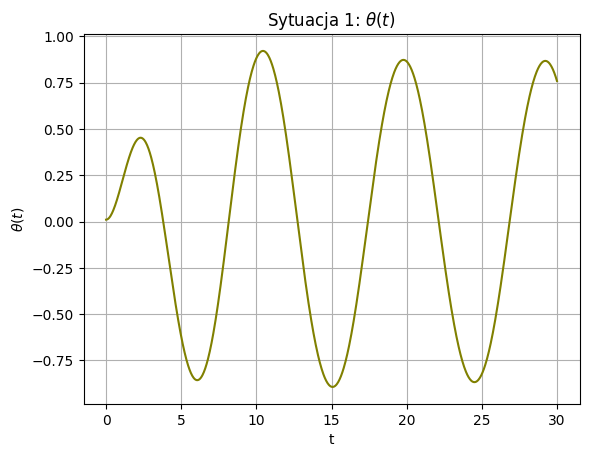

In [38]:
ts = np.linspace(0, 30, 1001)
plt.plot(ts, u1_values1, color="olive")
plt.grid(True)
plt.title("Sytuacja 1: $\\theta(t)$")
plt.xlabel("t")
plt.ylabel("$\\theta(t)$")
plt.show()

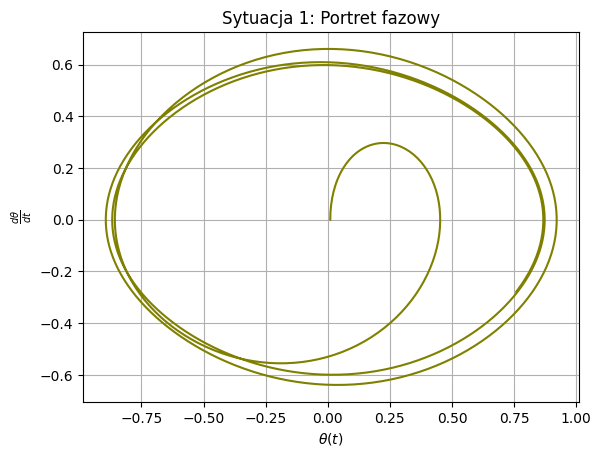

In [39]:
plt.plot(u1_values1, u2_values1, color="olive")
plt.grid(True)
plt.title("Sytuacja 1: Portret fazowy")
plt.ylabel("$\\frac{d\\theta}{dt}$")
plt.xlabel("$\\theta(t)$")
plt.show()

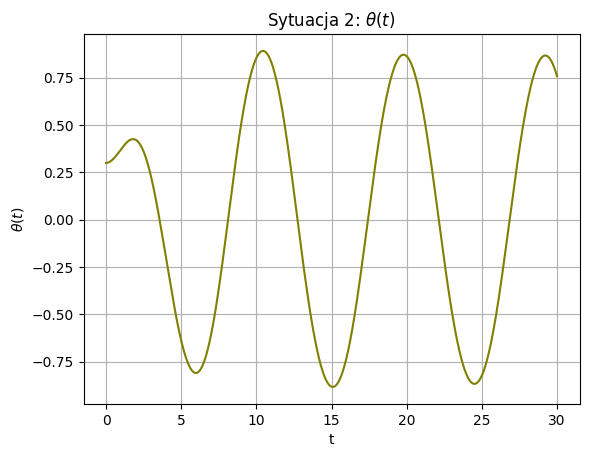

In [40]:
plt.plot(ts, u1_values2, color="olive")
plt.grid(True)
plt.title("Sytuacja 2: $\\theta(t)$")
plt.xlabel("t")
plt.ylabel("$\\theta(t)$")
plt.show()

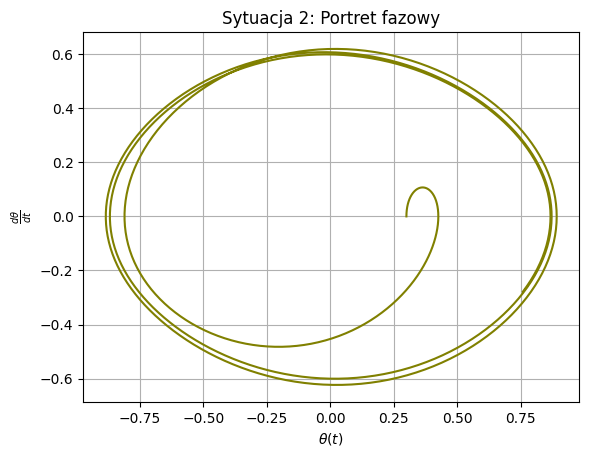

In [41]:
plt.plot(u1_values2, u2_values2, color="olive")
plt.grid(True)
plt.title("Sytuacja 2: Portret fazowy")
plt.ylabel("$\\frac{d\\theta}{dt}$")
plt.xlabel("$\\theta(t)$")
plt.show()

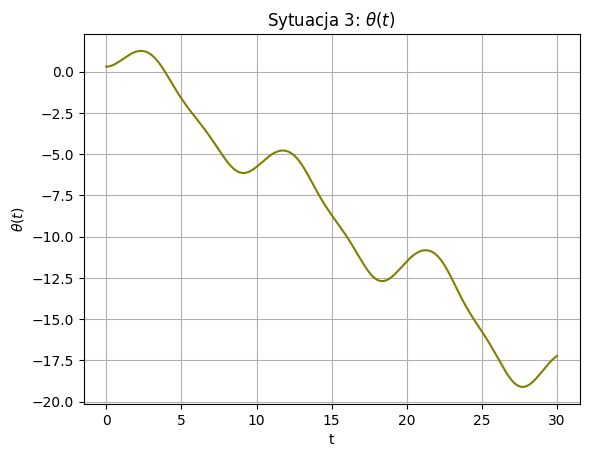

In [42]:
plt.plot(ts, u1_values3, color="olive")
plt.grid(True)
plt.title("Sytuacja 3: $\\theta(t)$")
plt.xlabel("t")
plt.ylabel("$\\theta(t)$")
plt.show()

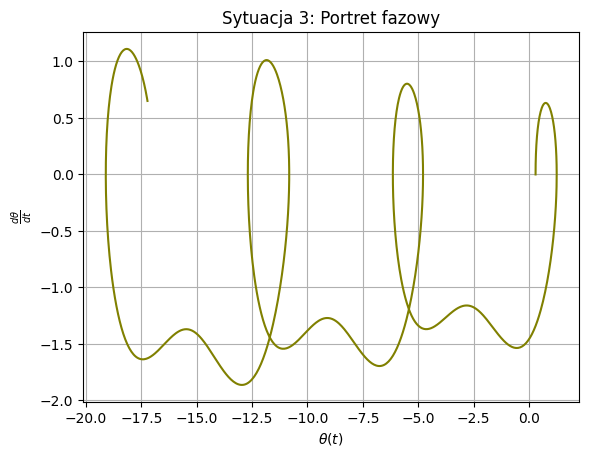

In [43]:
plt.plot(u1_values3, u2_values3, color="olive")
plt.grid(True)
plt.title("Sytuacja 3: Portret fazowy")
plt.ylabel("$\\frac{d\\theta}{dt}$")
plt.xlabel("$\\theta(t)$")
plt.show()

**Zadanie 4**

In [44]:
def bez_oporu(v_0, alpha, t_max, n_steps):
    ts = np.linspace(0, t_max, n_steps)
    ys = [0]
    xs = [0]
    vy = v_0 * np.sin(np.deg2rad(alpha))
    vx = v_0 * np.cos(np.deg2rad(alpha))
    for t in ts:
        if ys[-1] < 0:
            return xs, ys
        else:
            ys.append(vy * t - 1/2 * 9.81 * t**2)
            xs.append(vx * t)
    return xs, ys

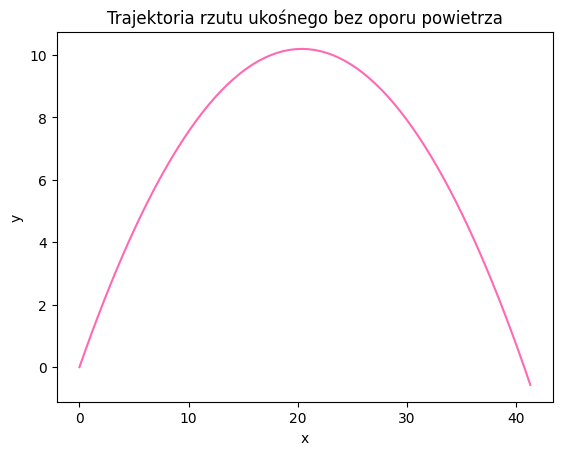

In [46]:
v_0 = 20
alpha = 45
t_max = 40
n_steps = 1000

xs, ys = bez_oporu(v_0, alpha, t_max, n_steps)

plt.plot(xs, ys, color="hotpink")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajektoria rzutu ukośnego bez oporu powietrza")
plt.show()


In [56]:
def runge_kutta_4th_order2(y_0, f, n, x_max):
    xs = np.linspace(0, x_max, n+1)
    h = xs[1] - xs[0]
    y = np.zeros((n+1, len(y_0)))
    y[0] = y_0
    for i in range(n):
        k1 = np.array(f(xs[i], y[i]))
        k2 = np.array(f(xs[i] + h/2, y[i] + h * k1/2))
        k3 = np.array(f(xs[i] + h/2, y[i] + h * k2/2))
        k4 = np.array(f(xs[i] + h, y[i] + h * k3))
        y[i+1] = y[i] + h / 6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

cw = 0.35
rho = 1.2
A = 0.05
m = 0.1
g = 9.81

In [57]:
def z_oporem(t, values):
    x, y_pos, vx, vy = values
    V = np.sqrt(vx**2 + vy**2) 
    ax = -0.5 * cw * rho * A * V * vx / m  
    ay = -g - 0.5 * cw * rho * A * V * vy / m 
    return [vx, vy, ax, ay]

In [58]:
tmax = 10
n_steps = 1000
y_0 = 0
x_0 = 0
alpha = 45
v0 = 10
vx0 = v0 * np.cos(np.deg2rad(alpha))
vy0 = v0 * np.sin(np.deg2rad(alpha))

values = runge_kutta_4th_order2([x_0, y_0, vx0, vy0], z_oporem,n_steps,t_max)
x_vals, y_vals = values[:, 0], values[:, 1]
valid_indices = y_vals >= 0
x_vals = x_vals[valid_indices]
y_vals = y_vals[valid_indices]

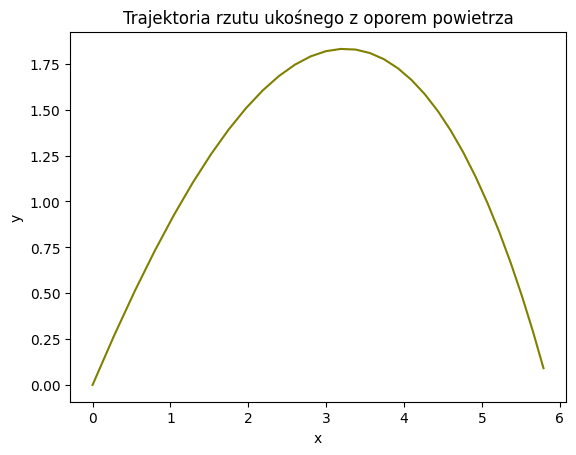

In [61]:
plt.plot(x_vals, y_vals, color="olive")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajektoria rzutu ukośnego z oporem powietrza")
plt.show()


**Zadanie 5**

Wprowadzamy podstawienie
$$
u_1 = y \\
u_2 = \frac{dy}{dx}
$$
I otrzymujemy równania
$$
u_1' = u_2 \\
u_2' =  -(1 - 0.2x) u_1^2
$$


In [51]:
def shooting_method(f, x_range, y0, target_y, guess, n_steps=1000, tolerance=1e-6, max_iter=100):
    x_min, x_max = x_range
    for i in range(max_iter):
        y0[1] = guess
        y_vals = runge_kutta_4th_order2(y0, f, n_steps, x_max)
        x_vals = np.linspace(x_min, x_max, n_steps + 1)
        error = y_vals[-1, 0] - target_y

        if abs(error) < tolerance:
            return x_vals, y_vals
        
        y0_temp = y0.copy()
        y0_temp[1] = guess + 1e-4
        y_vals_temp = runge_kutta_4th_order2(y0_temp, f, n_steps, x_max)
        derivative = (y_vals_temp[-1, 0] - y_vals[-1, 0]) / 1e-4
        guess -= error / derivative
    raise ValueError("Nie znaleziono rozwiązania w liczbie iteracji.")

In [52]:
def dydx(x, y):
    y1, y2 = y
    dy1_dx = y2
    dy2_dx = -(1 - 0.2 * x) * y1**2
    return [dy1_dx, dy2_dx]

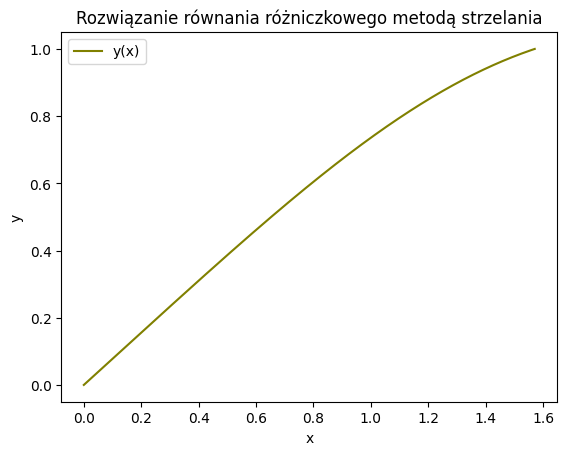

In [62]:
x_range = [0, np.pi / 2]
y_target = 1
y_initial = [0, 0]
initial_guess = 1

x_vals, y_vals = shooting_method(dydx, x_range, y_initial, y_target, initial_guess)


plt.plot(x_vals, y_vals[:, 0], label="y(x)", color="olive")
plt.title("Rozwiązanie równania różniczkowego metodą strzelania")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()